In [ ]:
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.applications import EfficientNetB3
from keras.models import Model
from keras.preprocessing import image
import numpy as np
from PIL import ImageFile
import tensorflow as tf
import io
import PIL
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model = tf.keras.applications.efficientnet.EfficientNetB3(
    include_top=False, weights='imagenet', pooling='max')

def extract_feature(img):

    img = img.resize((224,224))
    x = image.img_to_array(img)  # (3, 224, 224)
    x = np.expand_dims(x, axis=0)  # (1, 3, 224, 224)
    x = preprocess_input(x)
    features = model.predict(x)  # fc2

    return features

43950080/43941136 [==============================] - 2s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

workdir = '/content/drive/MyDrive/dataset_ml/amazon_men_actualizado/' #mario

Mounted at /content/drive


# Amazon Men

In [ ]:
user_train = np.load(workdir + 'dic_train_men.npy',allow_pickle='TRUE')
user_train=list(user_train.reshape(-1,1))[0][0]

user_test = np.load(workdir + 'dic_test_men.npy',allow_pickle='TRUE')
user_test=list(user_test.reshape(-1,1))[0][0]

Item = np.load(workdir + 'items_men.npy',allow_pickle='TRUE')
Item=list(Item.reshape(-1,1))[0][0]

In [ ]:
list(Item)[:100]

[98304,
 2,
 98309,
 98310,
 98311,
 65551,
 65552,
 65554,
 65555,
 65558,
 23,
 65560,
 32793,
 32794,
 65561,
 32796,
 65566,
 32799,
 65568,
 36,
 37,
 39,
 65580,
 65581,
 65585,
 50,
 65587,
 65588,
 65589,
 98354,
 98355,
 65592,
 58,
 65599,
 32835,
 68,
 65630,
 65631,
 65635,
 65636,
 98406,
 65654,
 98427,
 98430,
 32898,
 32899,
 32900,
 32901,
 98444,
 32919,
 32922,
 173,
 65711,
 65714,
 98491,
 189,
 190,
 98505,
 65741,
 65742,
 65754,
 65756,
 65757,
 98525,
 98528,
 98529,
 98530,
 229,
 98535,
 98538,
 238,
 240,
 241,
 242,
 243,
 244,
 245,
 33011,
 247,
 33009,
 252,
 254,
 98560,
 65792,
 258,
 259,
 268,
 270,
 277,
 278,
 288,
 33057,
 65833,
 65836,
 33079,
 65876,
 347,
 33122,
 65892,
 33125]

In [ ]:
user_train[11467]

[{'asin': 'B000VCGMA4',
  b'productid': 49976,
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'great design! I wish we had this one when I was a kid!',
  'reviewTime': '07 12, 2014',
  'reviewerID': 'A2EVH6OUMFHMPV',
  'reviewerName': 'argonaddict',
  'summary': 'Four Stars',
  'unixReviewTime': 1405123200},
 {'asin': 'B00G2TQ05W',
  b'productid': 49978,
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'Great shirt! the teenager who is sporting it is very happy!',
  'reviewTime': '07 12, 2014',
  'reviewerID': 'A2EVH6OUMFHMPV',
  'reviewerName': 'argonaddict',
  'summary': 'Four Stars',
  'unixReviewTime': 1405123200}]

In [ ]:
#items
items = set()

for user in user_train:
  for item in range(len(user_train[user])):
    items.add(user_train[user][item][b'productid'])

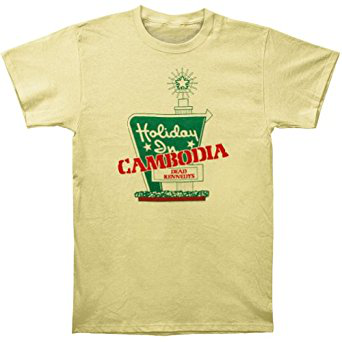

In [ ]:
img = Item[49976][b'imgs']
image_bytes = io.BytesIO(img)
PIL.Image.open(image_bytes)

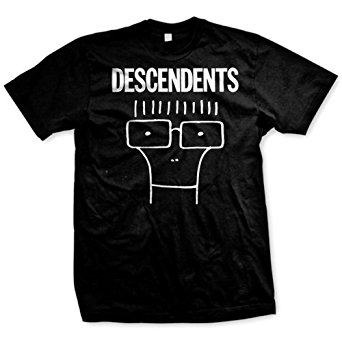

In [ ]:
img = Item[49978][b'imgs']
image_bytes = io.BytesIO(img)
PIL.Image.open(image_bytes)

In [ ]:
user_train[31564]

[{'asin': 'B0000AWIF4',
  b'productid': 3513,
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "We are Seattle Seahawks Season ticket holders and the November/December games present some issues when it comes to keeping warm. Even though my wife and I wear parkas and jeans and bring blankets, our legs still get cold. Silk long johns are the answer. They provide as much warmth as the heavier cotton types but barely add any bulk. They're comfortable and while after sitting for a couple of hours out in the cold of the stadium our legs still get cold, these help a lot.",
  'reviewTime': '04 15, 2013',
  'reviewerID': 'A3HJHV83O2U8BL',
  'reviewerName': 'Robert A. Grossman',
  'summary': 'Great for winter football games',
  'unixReviewTime': 1365984000},
 {'asin': 'B0051U1706',
  b'productid': 28581,
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': 'I use these with my Carhart Wool socks. We go to a lot of outdoor activities in the winter where we have to sit for a few hours and 

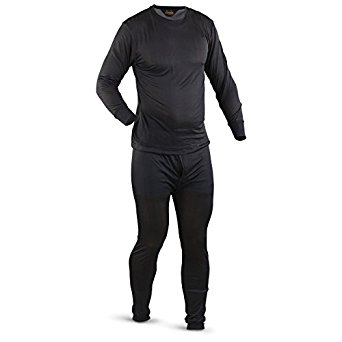

In [ ]:
img = Item[3513][b'imgs']
image_bytes = io.BytesIO(img)
PIL.Image.open(image_bytes)

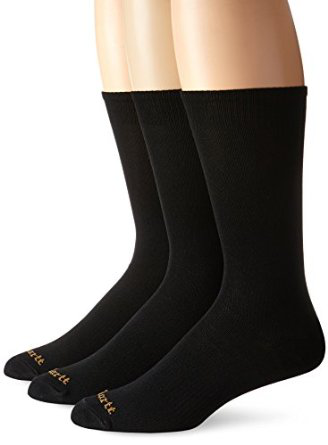

In [ ]:
img = Item[28581][b'imgs']
image_bytes = io.BytesIO(img)
PIL.Image.open(image_bytes)

In [ ]:
#Extraccion de caracteristicas
carac_img = {}

for item in items:
  img = Item[item][b'imgs']
  image_bytes = io.BytesIO(img)
  img_ = PIL.Image.open(image_bytes)

  carac_img[item] = extract_feature(img_)

In [ ]:
np.save('features_men_effnet.npy', carac_img)

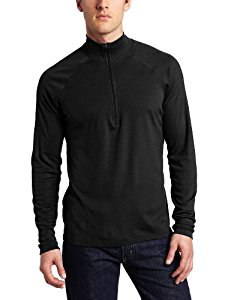

In [ ]:
img = Item[32794][b'imgs']
image_bytes = io.BytesIO(img)
PIL.Image.open(image_bytes)

# Amazon Women

In [ ]:
workdir = '/content/drive/MyDrive/ANN-2021-I/amazon_men_actualizado/women/'

In [ ]:
user_train = np.load(workdir + 'dic_train_women.npy',allow_pickle='TRUE')
user_train=list(user_train.reshape(-1,1))[0][0]

user_test = np.load(workdir + 'dic_test_women.npy',allow_pickle='TRUE')
user_test=list(user_test.reshape(-1,1))[0][0]

Item = np.load(workdir + 'items_women.npy',allow_pickle='TRUE')
Item=list(Item.reshape(-1,1))[0][0]

In [ ]:
#items
items = set()

for user in user_train:
  for item in range(len(user_train[user])):
    items.add(user_train[user][item][b'productid'])

In [ ]:
#Extraccion de caracteristicas
carac_img = {}

for item in items:
  img = Item[item][b'imgs']
  image_bytes = io.BytesIO(img)
  img_ = PIL.Image.open(image_bytes)

  carac_img[item] = extract_feature(img_)

In [ ]:
np.save('features_women_effnet.npy', carac_img)